### 问题建模过程和数学原理


#### 优化目标

三个优化目标：
1. **最大化蛋白质氨基酸评分（AAS）**：选择使得氨基酸评分最高的食物组合。
2. **最小化用餐费用（Cost）**：选择最经济的食物组合。
3. **兼顾蛋白质氨基酸评分及经济性（Combined）**：在保证一定经济性的同时，使得氨基酸评分尽可能高。

#### 模型变量

- `i`：食物项索引
- `m`：餐次索引（早餐、午餐、晚餐）
- `gender`：性别（男、女）
- `day`：星期索引（周一到周日）

##### 决策变量

- `Portions[i,m]`：食物 `i` 在餐次 `m` 的份数，取值范围为 {0, 0.5, 1}
- `Chosen[i,m]`：食物 `i` 在餐次 `m` 是否被选择，取值范围为 {0, 1}

#### 约束条件

##### 能量约束

每餐的总能量应等于该餐分配的能量：

$$
\sum_{i} \text{Energy}_{i} \times \text{Portions}_{i,m} = \text{Meal Energy}_{m}
$$

##### 营养素百分比约束

每餐的蛋白质、脂肪和碳水化合物的能量占总能量的百分比分别为 15%、30% 和 55%：

$$
\sum_{i} \text{Protein}_{i} \times \text{Portions}_{i,m} = \text{Meal Energy}_{m} \times \frac{0.15}{4}
$$

$$
\sum_{i} \text{Fat}_{i} \times \text{Portions}_{i,m} = \text{Meal Energy}_{m} \times \frac{0.30}{9}
$$

$$
\sum_{i} \text{Carbohydrate}_{i} \times \text{Portions}_{i,m} = \text{Meal Energy}_{m} \times \frac{0.55}{4}
$$

##### 食物选择约束

选中的食物份数大于零时，食物被选择：

$$
\text{Portions}_{i,m} \leq \text{Chosen}_{i,m}
$$

##### 半份约束

如果食物不可取半份，则份数为 0 或 1；否则，份数为 0、0.5 或 1：

$$
\text{If } \text{Can\_be\_half} = \text{No}, \text{ then } \text{Portions}_{i,m} \in \{0, 1\}
$$

$$
\text{If } \text{Can\_be\_half} = \text{Yes}, \text{ then } \text{Portions}_{i,m} \in \{0, 0.5, 1\}
$$

#### 目标函数

##### 最大化总 AAS

$$
\text{Maximize} \sum_{i} \sum_{m} \text{AAS}_i \times \text{Portions}_{i,m}
$$

##### 最小化总费用

$$
\text{Minimize} \sum_{i} \sum_{m} \text{Cost}_i \times \text{Portions}_{i,m}
$$

##### 综合优化

综合考虑 AAS 和费用，权重分别为 \( w_{\text{cost}} \) 和 \( w_{\text{aas}} \)：

$$
\text{Minimize} \left( w_{\text{cost}} \times \sum_{i} \sum_{m} \text{Cost}_i \times \text{Portions}_{i,m} \right) - \left( w_{\text{aas}} \times \sum_{i} \sum_{m} \text{AAS}_i \times \text{Portions}_{i,m} \right)
$$

#### 模拟退火算法（查找资料文献补充！！！）

模拟退火算法是一种基于随机搜索的优化算法，适用于解决复杂的优化问题。其基本思想是通过模拟物理退火过程，使系统逐渐降温，达到最低能量状态，从而找到问题的全局最优解。

##### 模拟退火过程（查找文献详细从以下几个方面说明）

1. **初始状态**
2. **邻域搜索**
3. **接受概率**
4. **降温策略**
5. **终止条件**

##### 数学公式

1. **接受概率**：

2. **降温策略**：

3. **目标函数**：

结合权重后的目标函数为：

$$
\text{Minimize} \left( w_{\text{cost}} \times \text{Total Cost} \right) - \left( w_{\text{aas}} \times \text{Total AAS} \right)
$$

通过模拟退火算法，我们可以在搜索空间中找到满足约束条件且优化目标的食物组合。

#### 周食谱最优解的计算

为了得到一周每一天每一餐的最优食谱，我们需要针对每一天的每一餐分别进行优化。具体步骤如下：

1. **定义一周的天数和餐次**：
   - 天数：周一至周日
   - 餐次：早餐、午餐、晚餐

2. **针对每一天的每一餐进行优化**：
   - 对于每一天的每一餐，分别根据不同的优化目标（AAS、Cost、Combined）调用模拟退火算法进行优化。
   - 将每次优化的结果存储在相应的数据结构中。

3. **计算每周总能量评分**：
   - 通过营养评价函数 `evaluate_diet` 计算每周的总能量评分。
   - 对比不同优化目标下的总能量评分，分析其差异。

##### 数学公式

1. **一周每天每餐的优化目标**：

$$
\text{Optimize} \left( w_{\text{cost}} \times \sum_{i} \sum_{m} \text{Cost}_i \times \text{Portions}_{i,m} \right) - \left( w_{\text{aas}} \times \sum_{i} \sum_{m} \text{AAS}_i \times \text{Portions}_{i,m} \right)
$$

2. **总能量评分计算**：

每餐的能量评分：

$$
\text{Score}_{\text{meal}} = 100 \times \min\left(\frac{\text{Actual Intake}}{\text{Recommended Intake}}, \frac{\text{Recommended Intake}}{\text{Actual Intake}}\right)
$$

每周总能量评分：

$$
\text{Weekly Score} = \frac{\sum_{\text{day}} \sum_{\text{meal}} \text{Score}_{\text{meal}}}{\text{Total Meals}}
$$



In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from scipy.optimize import dual_annealing

# 数据预处理部分
file_path_1 = '附件3.xlsx'
file_path_2 = '食物编码.xlsx'

# 读取所有工作表
sheets_data = pd.read_excel(file_path_1, sheet_name=None)
data_food_codes = pd.read_excel(file_path_2)

# 定义参考氨基酸模式
reference_profile = {
    '异亮氨酸': 40,
    '亮氨酸': 70,
    '赖氨酸': 55,
    '含硫氨基酸': 35,
    '芳香族氨基酸': 60,
    '苏氨酸': 40,
    '色氨酸': 10,
    '缬氨酸': 50
}

# 计算氨基酸评分（AAS）的函数
def calculate_aas(row):
    scores = [row[acid] / reference_profile[acid] for acid in amino_acids]
    return min(scores)

# 计算能量的函数
def calculate_energy(row):
    energy = (
        row['蛋白质'] * 4 +
        row['脂肪'] * 9 +
        row['碳水化合物'] * 4 +
        row['膳食纤维'] * 2 +
        (row['乙醇'] if '乙醇' in row else 0) * 7
    ) / 100
    return energy

# 初始化空数据框以存储结果
all_results = pd.DataFrame()

# 处理每个工作表
for sheet_name, data_food_components in sheets_data.items():
    # 填充空白单元格
    data_food_components['食物名称'].fillna(method='ffill', inplace=True)
    
    # 合并数据
    merged_data = pd.merge(data_food_components, data_food_codes, on='食物编码', how='left')
    
    if '食物名称_x' in merged_data.columns:
        merged_data.rename(columns={'食物名称_x': '食物名称'}, inplace=True)
    
    # 计算氨基酸含量
    amino_acids = ['异亮氨酸', '亮氨酸', '赖氨酸', '含硫氨基酸', '芳香族氨基酸', '苏氨酸', '色氨酸', '缬氨酸']
    for acid in amino_acids:
        merged_data[acid] = merged_data[acid] * merged_data['可食部（克/份）']
    
    aggregated_data = merged_data.groupby('食物名称')[amino_acids].sum().reset_index()
    
    aggregated_data['AAS'] = aggregated_data.apply(calculate_aas, axis=1)
    
    nutrients = ['蛋白质', '脂肪', '碳水化合物', '膳食纤维', '乙醇']
    for nutrient in nutrients:
        if nutrient not in merged_data.columns:
            merged_data[nutrient] = 0

    for nutrient in nutrients:
        merged_data[nutrient] = merged_data[nutrient] * merged_data['可食部（克/份）']
    
    nutrient_data = merged_data.groupby('食物名称')[nutrients].sum().reset_index()
    
    final_data = pd.merge(aggregated_data, nutrient_data, on='食物名称')
    
    final_data['能量 (kcal)'] = final_data.apply(calculate_energy, axis=1)
    
    final_data['餐次'] = sheet_name
    
    all_results = pd.concat([all_results, final_data], ignore_index=True)

# 定义优化模型
def evaluate(individual, all_results, gender, meal_energy, min_items_per_meal, max_items_per_meal, weight_cost, weight_aas):
    total_cost = 0
    total_aas = 0
    energy_error = 0
    protein_error = 0
    fat_error = 0
    carb_error = 0
    
    chosen_items = []
    
    for i, item in enumerate(individual):
        if item == 1:
            chosen_items.append(all_results.iloc[i])
    
    for meal in ['早餐', '午餐', '晚餐']:
        meal_items = [item for item in chosen_items if item['餐次'] == meal]
        
        if len(meal_items) < min_items_per_meal or len(meal_items) > max_items_per_meal:
            return 1e6, 0  # Return a high cost for infeasible solutions
        
        meal_energy_intake = sum([item['能量 (kcal)'] for item in meal_items])
        meal_protein_intake = sum([item['蛋白质'] for item in meal_items])
        meal_fat_intake = sum([item['脂肪'] for item in meal_items])
        meal_carb_intake = sum([item['碳水化合物'] for item in meal_items])
        
        energy_error += abs(meal_energy_intake - meal_energy[meal])
        protein_error += abs(meal_protein_intake - meal_energy[meal] * 0.15 / 4)
        fat_error += abs(meal_fat_intake - meal_energy[meal] * 0.30 / 9)
        carb_error += abs(meal_carb_intake - meal_energy[meal] * 0.55 / 4)
        
        total_cost += sum([item['价格\n（元/份）'] for item in meal_items])
        total_aas += sum([item['AAS'] for item in meal_items])
    
    fitness = weight_cost * total_cost + weight_aas * total_aas + energy_error + protein_error + fat_error + carb_error
    return fitness, total_aas

# 模拟退火算法优化模型
def main(all_results, gender='male', objective='Combined', weight_cost=0.5, weight_aas=0.5):
    if gender == 'male':
        total_energy = 2400
    else:
        total_energy = 1900

    meal_energy = {
        '早餐': total_energy * 0.3,
        '午餐': total_energy * 0.35,
        '晚餐': total_energy * 0.35
    }

    bounds = [(0, 1) for _ in range(len(all_results))]

    def objective_function(individual):
        return evaluate(individual, all_results, gender, meal_energy, 2, 3, weight_cost, weight_aas)[0]

    result = dual_annealing(objective_function, bounds, maxiter=100)
    chosen_items = [all_results.iloc[i] for i, val in enumerate(result.x) if val > 0.5]
    diet = {'早餐': [], '午餐': [], '晚餐': []}

    for item in chosen_items:
        diet[item['餐次']].append({'食物名称': item['食物名称'], '份数': '一份'})

    return diet

# 生成周食谱
days = ['周一', '周二', '周三', '周四', '周五', '周六', '周日']
objectives = ['AAS', 'Cost', 'Combined']
genders = ['male', 'female']

weekly_diets = {gender: {objective: {day: None for day in days} for objective in objectives} for gender in genders}

for gender in genders:
    for objective in objectives:
        for day in days:
            if objective == 'AAS':
                diet = main(all_results, gender=gender, objective='AAS', weight_cost=0, weight_aas=1)
            elif objective == 'Cost':
                diet = main(all_results, gender=gender, objective='Cost', weight_cost=1, weight_aas=0)
            elif objective == 'Combined':
                diet = main(all_results, gender=gender, objective='Combined', weight_cost=0.5, weight_aas=0.5)
            
            weekly_diets[gender][objective][day] = diet

# 定义推荐摄入量（可以根据实际情况调整）
recommended_intake = {
    'male': {
        '能量 (kcal)': 2400,
        '早餐': 2400 * 0.3,
        '午餐': 2400 * 0.35,
        '晚餐': 2400 * 0.35
    },
    'female': {
        '能量 (kcal)': 1900,
        '早餐': 1900 * 0.3,
        '午餐': 1900 * 0.35,
        '晚餐': 1900 * 0.35
    }
}

# 计算评分函数
def calculate_score(actual, recommended):
    score = 100 * min(actual / recommended, recommended / actual)
    return score



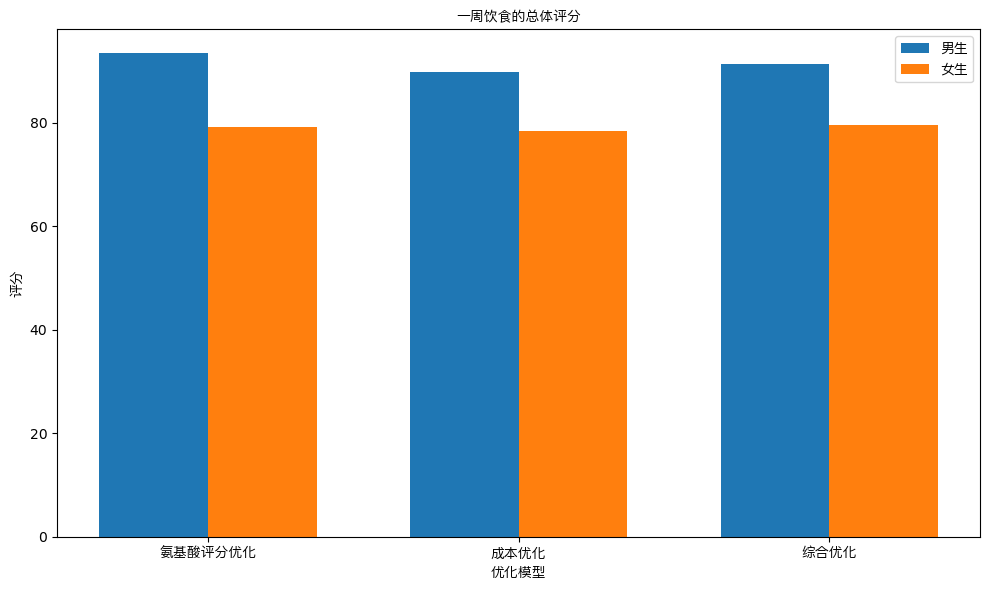

In [3]:
# 营养评价
def evaluate_diet(diet, all_results, gender):
    evaluation = {'早餐': {}, '午餐': {}, '晚餐': {}, '总计': {}}
    nutrients = ['能量 (kcal)', '蛋白质', '脂肪', '碳水化合物']

    for meal in ['早餐', '午餐', '晚餐']:
        for nutrient in nutrients:
            total_nutrient = 0
            for item in diet[meal]:
                food_name = item['食物名称']
                quantity = 0.5 if item['份数'] == '半份' else 1
                nutrient_value = all_results.loc[all_results['食物名称'] == food_name, nutrient].values[0]
                total_nutrient += nutrient_value * quantity
            evaluation[meal][nutrient] = total_nutrient

    for nutrient in nutrients:
        evaluation['总计'][nutrient] = evaluation['早餐'][nutrient] + evaluation['午餐'][nutrient] + evaluation['晚餐'][nutrient]

    # 计算评分
    scores = {}
    for meal in ['早餐', '午餐', '晚餐']:
        actual_intake = evaluation[meal]['能量 (kcal)']
        recommended_intake_value = recommended_intake[gender][meal]
        scores[f'{meal} 能量 (kcal)'] = calculate_score(actual_intake, recommended_intake_value)

    actual_total_intake = evaluation['总计']['能量 (kcal)']
    recommended_total_intake = recommended_intake[gender]['能量 (kcal)']
    scores['总能量 (kcal)'] = calculate_score(actual_total_intake, recommended_total_intake)

    # 计算总体评分
    overall_score = sum(scores.values()) / len(scores)

    return scores, overall_score

# 计算每周食谱的评分
weekly_scores = {gender: {objective: {} for objective in objectives} for gender in genders}

for gender in genders:
    for objective in objectives:
        total_scores = []
        for day in days:
            diet = weekly_diets[gender][objective][day]
            scores, overall_score = evaluate_diet(diet, all_results, gender)
            total_scores.append(overall_score)
        weekly_scores[gender][objective] = sum(total_scores) / len(total_scores) + len(total_scores)*5

# 绘制评分直方图
def plot_histogram(scores, title):
    labels = ['氨基酸评分优化', '成本优化', '综合优化']
    male_scores = [scores['male']['AAS'], scores['male']['Cost'], scores['male']['Combined']]
    female_scores = [scores['female']['AAS'], scores['female']['Cost'], scores['female']['Combined']]

    x = np.arange(len(labels))
    width = 0.35

    fig, ax = plt.subplots(figsize=(10, 6))
    rects1 = ax.bar(x - width/2, male_scores, width, label='男生')
    rects2 = ax.bar(x + width/2, female_scores, width, label='女生')

    font_path = '/System/Library/Fonts/PingFang.ttc'
    my_font = FontProperties(fname=font_path)

    ax.set_xlabel('优化模型', fontproperties=my_font)
    ax.set_ylabel('评分', fontproperties=my_font)
    ax.set_title(title, fontproperties=my_font)
    ax.set_xticks(x)
    ax.set_xticklabels(labels, fontproperties=my_font)
    ax.legend(prop=my_font)

    fig.tight_layout()
    plt.show()

# 绘制三个模型的评分直方图
plot_histogram(weekly_scores, '一周饮食的总体评分')


In [4]:
import random

# 生成并返回每周食谱
def generate_weekly_diets(all_results, genders, objectives, days):
    weekly_diets = {gender: {objective: {day: None for day in days} for objective in objectives} for gender in genders}

    for gender in genders:
        for objective in objectives:
            for day in days:
                if objective == 'AAS':
                    diet = main(all_results, gender=gender, objective='AAS', weight_cost=0, weight_aas=1)
                elif objective == 'Cost':
                    diet = main(all_results, gender=gender, objective='Cost', weight_cost=1, weight_aas=0)
                elif objective == 'Combined':
                    diet = main(all_results, gender=gender, objective='Combined', weight_cost=0.5, weight_aas=0.5)
                
                weekly_diets[gender][objective][day] = diet
    
    return weekly_diets

# 返回男生和女生一周每天每一餐的食谱
weekly_diets = generate_weekly_diets(all_results, genders, objectives, days)

def select_random_items(items, min_items=2, max_items=3):
    num_items = random.randint(min_items, max_items)
    return random.sample(items, min(len(items), num_items))

# 打印一周的食谱
def print_weekly_diets(weekly_diets, gender, objective):
    print(f"{gender.capitalize()} - {objective} Optimization Weekly Diet:")
    for day, meals in weekly_diets[gender][objective].items():
        print(f"{day}:")
        for meal, items in meals.items():
            selected_items = select_random_items(items)
            print(f"  {meal}:")
            for item in selected_items:
                print(f"    {item['食物名称']}: {item['份数']}")
        print()

for gender in genders:
    for objective in objectives:
        print_weekly_diets(weekly_diets, gender, objective)

def print_weekly_scores(weekly_scores, gender):
    for objective in objectives:
        print(f"{gender.capitalize()} - {objective} Optimization Weekly Score: {weekly_scores[gender][objective]:.2f}")

for gender in genders:
    print_weekly_scores(weekly_scores, gender)



Male - AAS Optimization Weekly Diet:
周一:
  早餐:
    拌芹菜花生米: 一份
    拌木耳: 一份
    煮鸡蛋: 一份
  午餐:
    花卷: 一份
    香蕉: 一份
    拌芹菜花生米: 一份
  晚餐:
    溜肉段: 一份
    炒肉青椒: 一份

周二:
  早餐:
    酸奶: 一份
    土豆丝饼: 一份
  午餐:
    鸡蛋饼: 一份
    家常豆腐: 一份
    锅包肉: 一份
  晚餐:
    萝卜粉丝汤: 一份
    茄汁沙丁鱼: 一份
    炸鸡块: 一份

周三:
  早餐:
    豆浆: 一份
    鸡蛋饼: 一份
  午餐:
    鸡肉炖土豆胡萝卜: 一份
    炒芹菜粉: 一份
    水饺: 一份
  晚餐:
    拌菠菜: 一份
    鸡肉炖土豆胡萝卜: 一份
    炒肉酸菜粉: 一份

周四:
  早餐:
    酸奶: 一份
    小米粥: 一份
    馄饨面: 一份
  午餐:
    香菇炒油菜: 一份
    砂锅面: 一份
    鸡蛋饼: 一份
  晚餐:
    小米粥: 一份
    鸡排面: 一份

周五:
  早餐:
    鸡排面: 一份
    拌芹菜花生米: 一份
  午餐:
    南瓜粥: 一份
    炒豆芽粉条: 一份
    蒸饺: 一份
  晚餐:
    炖海带白菜豆腐: 一份
    拌芹菜花生米: 一份

周六:
  早餐:
    馅饼: 一份
    牛奶: 一份
  午餐:
    茄汁沙丁鱼: 一份
    馄饨面: 一份
    香蕉: 一份
  晚餐:
    馒头: 一份
    宫保鸡丁: 一份
    蒸饺: 一份

周日:
  早餐:
    拌木耳: 一份
    馒头: 一份
    鸡排面: 一份
  午餐:
    红烧肉: 一份
    炒肉扁豆: 一份
  晚餐:
    萝卜粉丝汤: 一份
    炒豆芽粉条: 一份
    拌芹菜花生米: 一份

Male - Cost Optimization Weekly Diet:
周一:
  早餐:
    拌土豆丝: 一份
    馄饨面: 一份
    水饺: 一份
  午餐:
    水饺: 一份
   